# Data Visualization

In [86]:
import warnings
warnings.filterwarnings('ignore')

## 1. Why Data Visualization

 - Data visualization amplifies your messaging
 - Data visualization provides clearer understanding
 - Data visualization aids decision analysis


## 2. Data Visualization in Python

- Data can be stored as lists, data frames.
- The common way to provide data is using **Pandas** 

In [87]:
import pandas as pd
pokemon = pd.read_csv('data\pokemon.csv', index_col = 0)
pokemon.head(5)

Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  \
#                                                                              
1              Bulbasaur  Grass  Poison    318  45      49       49       65   
2                Ivysaur  Grass  Poison    405  60      62       63       80   
3               Venusaur  Grass  Poison    525  80      82       83      100   
3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123      122   
4             Charmander   Fire     NaN    309  39      52       43       60   

   Sp. Def  Speed  Generation  Legendary  
#                                         
1       65     45           1      False  
2       80     60           1      False  
3      100     80           1      False  
3      120     80           1      False  
4       50     65           1      False

- Nowadays, a lot of libraries that targets visualization data in Python programing language
    - Matplotlib
    - Seaborn
    - Bokeh
    - Chartify
    - Plotly

## 3. Univariate plotting

Focus on a single column, or the number records in data which include a specific value or interval value

### Bar chart

####       Matplotlib

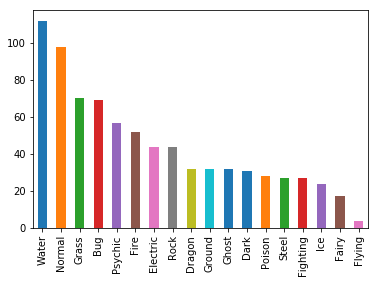

In [88]:
import matplotlib.pyplot as plt
pokemon['Type 1'].value_counts().plot.bar() 
plt.show()
#value_counts return a series with the number appearacne with each value

### Bar chart

#### Seaborn

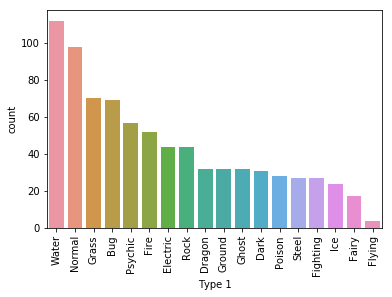

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(pokemon['Type 1'], order = pokemon['Type 1'].value_counts().index)
plt.xticks(rotation = 90);

### Line Chart 


#### Matplotlib

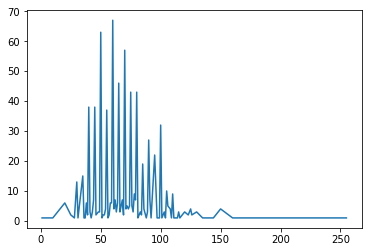

In [90]:
pokemon['HP'].value_counts().sort_index().plot.line();

### Line Chart 


#### Seaborn

KDE, short for "kernel density estimate", is a statistical technique for smoothing out data noise. It addresses an important fundamental weakness of a line chart: it will buff out outlier or "in-betweener" values which would cause a line chart to suddenly dip.

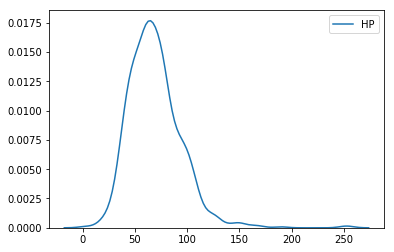

In [91]:
sns.kdeplot(pokemon['HP']);

### Histogram

#### Matplotlib

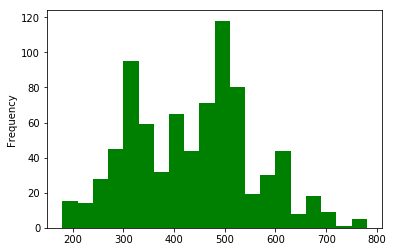

In [92]:
pokemon['Total'].plot.hist(bins = 20, color = 'green');

### Histogram

#### Seaborn

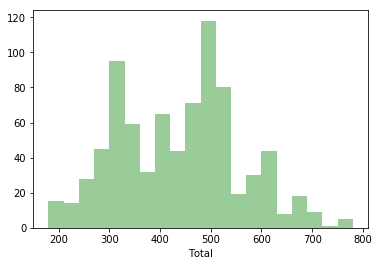

In [93]:
sns.distplot(pokemon['Total'], bins = 20, kde = False, color = 'green');

### Bar, line or histogram?

- Bar: nomial categorical variables which do not have too many values
- Line: ordinal categorical variables 
- Histogram: interval variable and the range is big

## 4. Bivariate plotting

Focus on plotting the relationship between two variables at a time.

### Scatter plot

#### Matplotlib

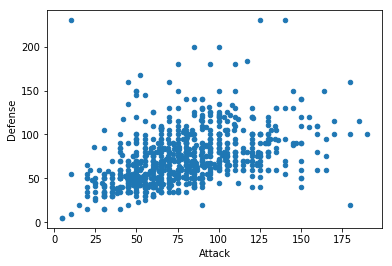

In [94]:
pokemon.plot.scatter(x = 'Attack', y = 'Defense');

### Scatter plot

#### Seaborn

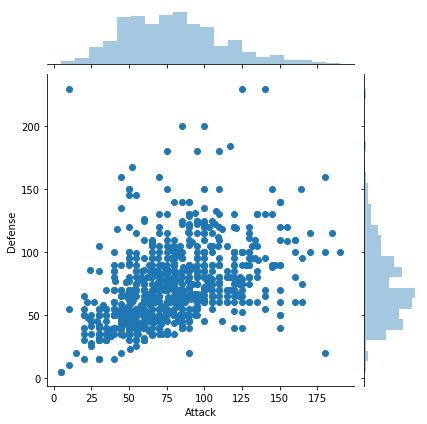

In [95]:
sns.jointplot(x = 'Attack', y = 'Defense', data = pokemon);

### Hexplot

Because of their weakness to overplotting, scatter plots work best with:
    - Relatively small datasets.
    - Variables which have a large number of unique value. 
So, we need another better plot, Hexplot.
Hexplot aggregates points in space into hexagons, and then colors those hexagons based on the values with them.

### Hexplot

#### Matplotlib

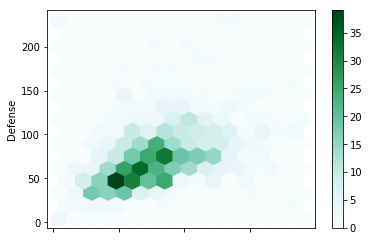

In [96]:
pokemon.plot.hexbin(x = 'Attack', y = 'Defense', gridsize = 15);

### Hexplot

#### Seaborn

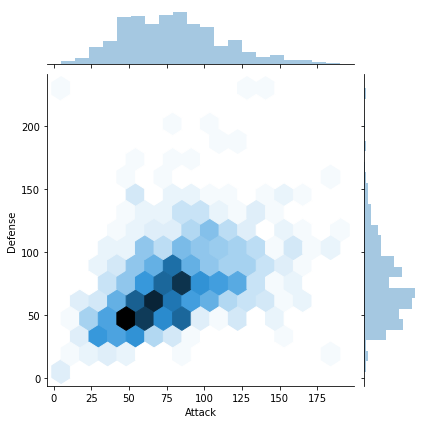

In [97]:
sns.jointplot(x = 'Attack', y = 'Defense', data = pokemon, kind = 'hex', gridsize = 15);

### Box plot

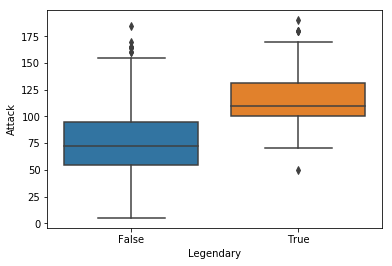

In [98]:
sns.boxplot(x = 'Legendary', y = 'Attack', data = pokemon);

### Violin plot

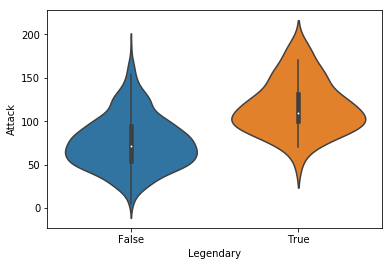

In [99]:
sns.violinplot(x = 'Legendary', y = 'Attack', data = pokemon);

## 5. Multivariate plotting

### Multivariate scatter plots

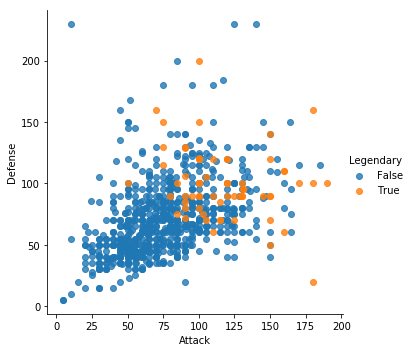

In [100]:
sns.lmplot(x = 'Attack', y = 'Defense', hue = 'Legendary', data = pokemon, fit_reg = False);

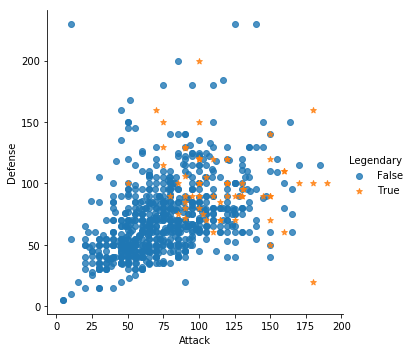

In [101]:
sns.lmplot(x = 'Attack', y = 'Defense', markers = ['o','*'], hue = 'Legendary', data = pokemon, fit_reg = False);

### Heatmap

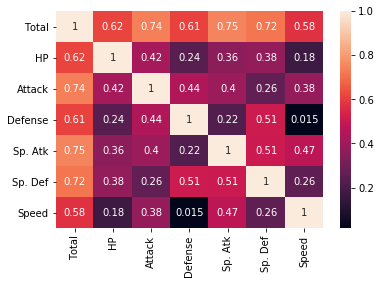

In [102]:
f = (pokemon.loc[:, ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]).corr()
sns.heatmap(f, annot = True);

### Grouped box plot

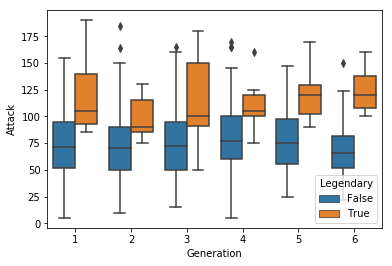

In [103]:
sns.boxplot(x = 'Generation', y = 'Attack', hue = 'Legendary', data = pokemon);

## 6. Styling your plots

### Figure size

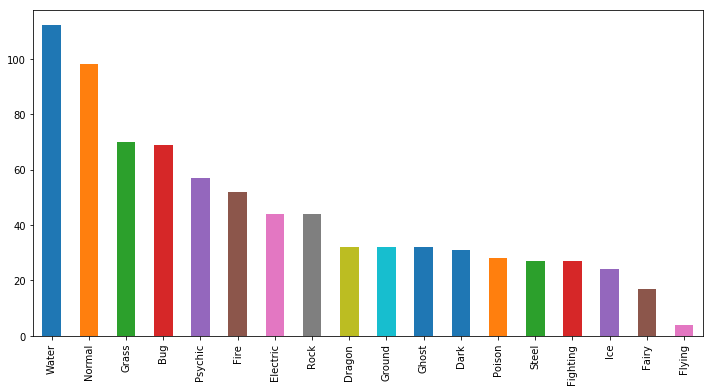

In [104]:
pokemon['Type 1'].value_counts().plot.bar(figsize = (12,  6));

### Color

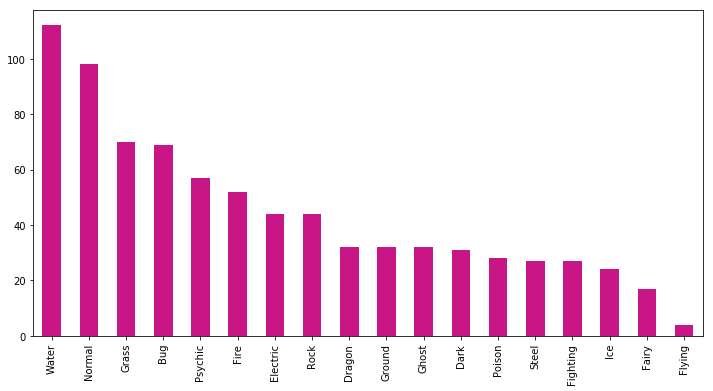

In [105]:
pokemon['Type 1'].value_counts().plot.bar(figsize = (12,  6), 
                                          color = 'mediumvioletred');

### Font size

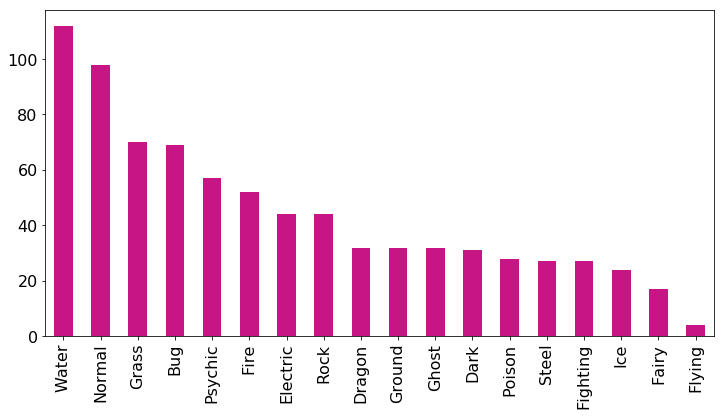

In [106]:
pokemon['Type 1'].value_counts().plot.bar(figsize = (12,  6), 
                                          color = 'mediumvioletred',
                                          fontsize = 16);

### Title, Axis label, border

#### Title

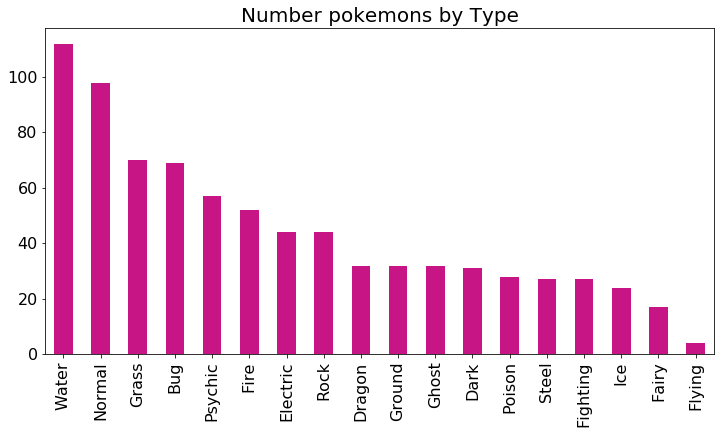

In [107]:
ax = pokemon['Type 1'].value_counts().plot.bar(figsize = (12,  6), 
                                          color = 'mediumvioletred',
                                          fontsize = 16);
ax.set_title(label = 'Number pokemons by Type', fontsize = 20);

#### Axis Label

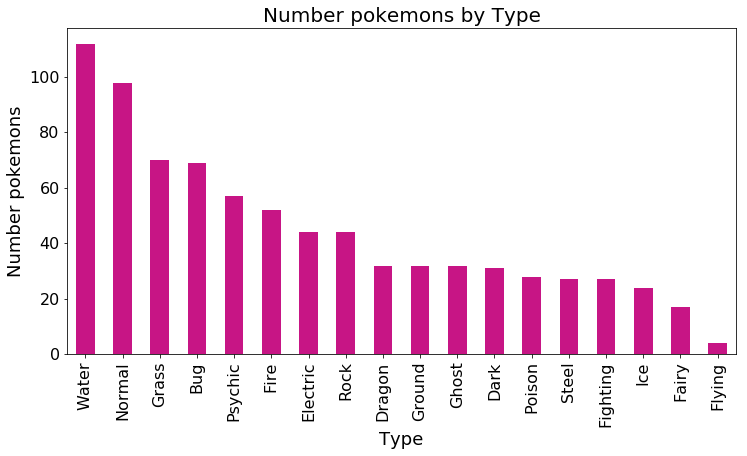

In [108]:
ax = pokemon['Type 1'].value_counts().plot.bar(figsize = (12,  6), 
                                          color = 'mediumvioletred',
                                          fontsize = 16);
ax.set_title(label = 'Number pokemons by Type', fontsize = 20);
ax.set_xlabel('Type', fontsize = 18)
ax.set_ylabel('Number pokemons', fontsize = 18);

#### Turn off the border

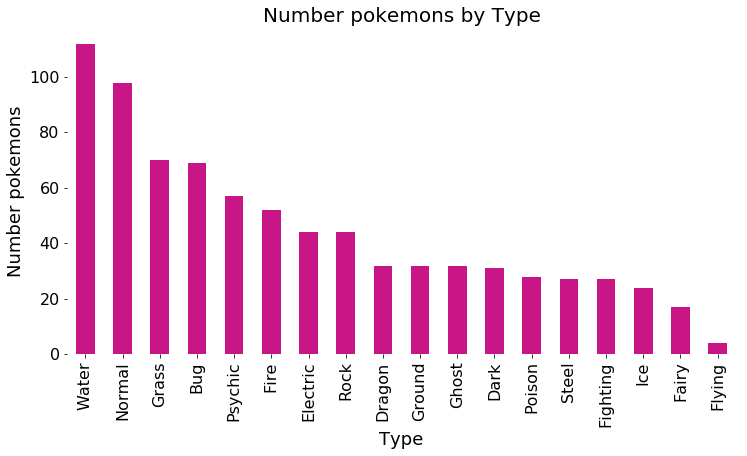

In [109]:
ax = pokemon['Type 1'].value_counts().plot.bar(figsize = (12,  6), 
                                          color = 'mediumvioletred',
                                          fontsize = 16);
ax.set_title(label = 'Number pokemons by Type', fontsize = 20);
ax.set_xlabel('Type', fontsize = 18)
ax.set_ylabel('Number pokemons', fontsize = 18)
sns.despine(bottom = True, left = True);

### Subplots

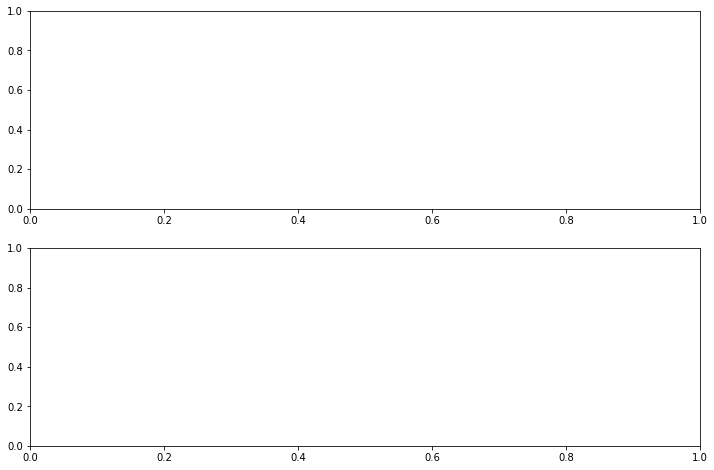

In [110]:
fig, axarr = plt.subplots(2, 1, figsize=(12, 8))

When pandas generates a chart, behind the scenes here is what actually does:
    - Generate  a new matplotlib Figure object
    - Create a new matplotlib AxesSubplot object and assign it to the figure
    - Use AxesSubplot methods to draw the information on the screen
    - Return the result to the user
Subplots operation created on overall Figure with two AxesSubplots vertically nested inside

In [111]:
axarr

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DFF619AAC8>,
      dtype=object)

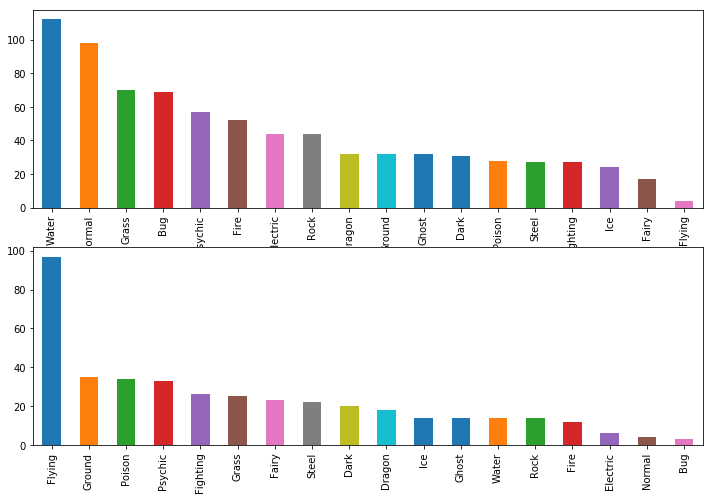

In [112]:
fig, axarr = plt.subplots(2, 1, figsize=(12, 8))
pokemon['Type 1'].value_counts().plot.bar(
    ax=axarr[0]
)

pokemon['Type 2'].value_counts().plot.bar(
    ax=axarr[1]
);


### Faceting with seaborn

#### The Facet Grid

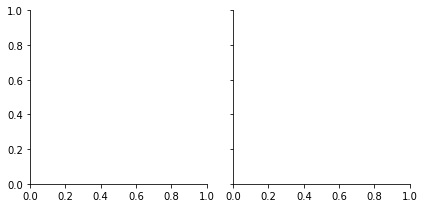

In [113]:
g = sns.FacetGrid(pokemon, col = 'Legendary')


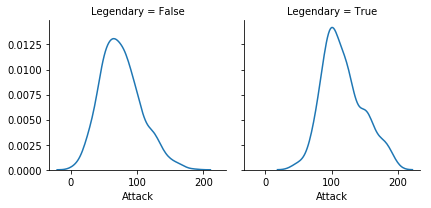

In [114]:
g = sns.FacetGrid(pokemon, col = 'Legendary')
g.map(sns.kdeplot, 'Attack')

#### Pairplot 

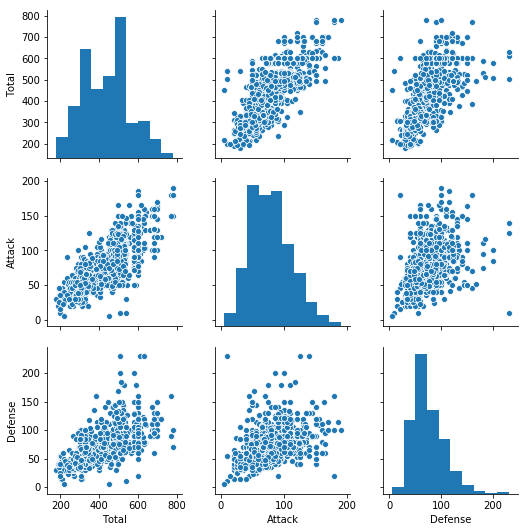

In [115]:
sns.pairplot(pokemon[['Total', 'Attack', 'Defense']]);

## 7. Interactive Visualization

### Bokeh

Bokeh is an interactive visualization library that targets modern web browsers for presentation

In [116]:
from bokeh.plotting import figure, output_file, show, output_notebook
# prepare some data
x = [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]; y0 = [i**2 for i in x];y1 = [10**i for i in x];y2 = [10**(i**2) for i in x]
output_notebook()
# create a new plot
p = figure(
   tools="pan,box_zoom,reset,save",y_axis_type="log", y_range=[0.001, 10**11], title="log axis example",
   x_axis_label='sections', y_axis_label='particles', plot_width=400, plot_height=400)
# add some renderers
p.line(x, x, legend="y=x")
p.circle(x, x, legend="y=x", fill_color="white", size=8)
p.line(x, y0, legend="y=x^2", line_width=3)
p.line(x, y1, legend="y=10^x", line_color="red")
p.circle(x, y1, legend="y=10^x", fill_color="red", line_color="red", size=6)
p.line(x, y2, legend="y=10^x^2", line_color="orange", line_dash="4 4")
# show the results
show(p)

Loading BokehJS ...

__Bokeh's key concepts:__
- Figure

In [117]:
p = figure(
   tools="pan,box_zoom,reset,save",title="axis example",x_axis_label='sections', y_axis_label='particles',
    plot_width=400, plot_height=400
)
show(p)

    - Categorical Axes

In [118]:
from bokeh.plotting import figure, output_notebook, show
factors = ["a", "b", "c", "d", "e", "f", "g", "h"]
x = [50, 40, 65, 10, 25, 37, 80, 60]
output_notebook
p = figure(y_range=factors, plot_width=400, plot_height=400)
p.circle(x, factors, size=15, fill_color="orange", line_color="green", line_width=3)
show(p)

    - Datetime Axes

In [119]:
import pandas as pd
from bokeh.plotting import figure, output_notebook, show
from bokeh.sampledata.stocks import AAPL
df = pd.DataFrame(AAPL)
df['date'] = pd.to_datetime(df['date'])
output_notebook()

# create a new plot with a datetime axis type
p = figure(plot_width=800, plot_height=250, x_axis_type="datetime")

p.line(df['date'], df['close'], color='navy', alpha=0.5)
show(p)

Loading BokehJS ...

    - Log Scale Axes

In [120]:
x = [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
y = [10**xx for xx in x]
output_notebook()
# create a new plot with a log axis type
p = figure(plot_width=400, plot_height=400, y_axis_type="log")
p.line(x, y, line_width=2)
p.circle(x, y, fill_color="white", size=8)
show(p)

Loading BokehJS ...

- Providing data by ColumnDataSouce
    - Implicit
    - Explicit

In [121]:
x_values = [1, 2, 3, 4, 5]
y_values = [6, 7, 2, 3, 6]
p = figure(plot_width=400, plot_height=400)
p.circle(x=x_values, y=y_values, size = 20)
show(p)

In [122]:
from bokeh.models import ColumnDataSource

data = {'x_values': [1, 2, 3, 4, 5],
        'y_values': [6, 7, 2, 3, 6]}

source = ColumnDataSource(data=data)
p.circle(x='x_values', y='y_values', source=source)
show(p)

__Bokeh Widgets__

Button

In [123]:
from bokeh.layouts import widgetbox
from bokeh.models.widgets import Button
output_notebook()
button = Button(label="Foo", button_type="success")
show(widgetbox(button))

Loading BokehJS ...

Slider

In [124]:
from bokeh.models.widgets import Slider
output_file("slider.html")
slider = Slider(start = 0, end=10, value=1, step=.1, title="Stuff")
show(widgetbox(slider))

Select

In [125]:
from bokeh.layouts import widgetbox
from bokeh.models.widgets import Select

output_notebook()
select = Select(title="Option:", value="foo", options=["foo", "bar", "baz", "quux"])
show(widgetbox(select))

Loading BokehJS ...

__Bokeh JavaScripts callback__

In [126]:
from bokeh.layouts import column
from bokeh.models import CustomJS, ColumnDataSource, Slider
from bokeh.plotting import Figure, output_file, show
output_file("js_on_change.html")
x = [x*0.005 for x in range(0, 200)]; y = x
source = ColumnDataSource(data=dict(x=x, y=y))
plot = Figure(plot_width=400, plot_height=400)
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)
callback = CustomJS(args=dict(source=source), code="""
    var data = source.data; var f = cb_obj.value; var x = data['x'];var y = data['y']
    for (var i = 0; i < x.length; i++) { y[i] = x[i]**f
    }
    source.change.emit();""")
slider = Slider(start=0.1, end=4, value=1, step=.1, title="power")
slider.js_on_change('value', callback)
layout = column(slider, plot)
show(layout)

In [127]:
from random import random
from bokeh.models import CustomJS, ColumnDataSource
from bokeh.plotting import figure, output_file, show
output_file("callback.html")
x = [random() for x in range(500)]
y = [random() for y in range(500)]
color = ["navy"] * len(x)

s1 = ColumnDataSource(data=dict(x=x, y=y, color=color))
p = figure(plot_width=400, plot_height=400, tools="lasso_select", title="Select Here")
p.circle('x', 'y', color='color', size=8, source=s1, alpha=0.4)

s2 = ColumnDataSource(data=dict(x=[0, 1], ym=[0.5, 0.5]))
p.line(x='x', y='ym', color="orange", line_width=5, alpha=0.6, source=s2)

callback = CustomJS(args=dict(s1 = s1, s2=s2), code="""
        const inds = s1.selected.indices;
        const d = s1.data;
        var ym = 0

        if (inds.length == 0)
            return;

        for (var i = 0; i < d['color'].length; i++) {
            d['color'][i] = "navy"
        }
        for (var i = 0; i < inds.length; i++) {
            d['color'][inds[i]] = "firebrick"
            ym += d['y'][inds[i]]
        }

        ym /= inds.length
        s2.data['ym'] = [ym, ym]

        s1.change.emit();
        s2.change.emit();
    """)



In [128]:
s1.selected.js_on_change('indices', callback)
show(p)

__CustomJS with Python function__       

In [129]:
from bokeh.layouts import column
from bokeh.models import CustomJS, ColumnDataSource, Slider
from bokeh.plotting import Figure, output_notebook, show

output_notebook()

x = [x*0.005 for x in range(0, 200)]
y = x

source = ColumnDataSource(data=dict(x=x, y=y))

plot = Figure(plot_width=400, plot_height=400)
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

def callback(source=source, window=None):
    data = source.data
    f = cb_obj.value  
    x, y = data['x'], data['y']
    for i in range(len(x)):
        y[i] = window.Math.pow(x[i], f)
    source.change.emit()

slider = Slider(start=0.1, end=4, value=1, step=.1, title="power",
                callback=CustomJS.from_py_func(callback))

layout = column(slider, plot)

Loading BokehJS ...

In [130]:
show(layout)

__Callback with Bokeh Sever, no JavaScript, just Python__

In [149]:
from os.path import dirname, join
import os
import numpy as np
import pandas.io.sql as psql
import sqlite3 as sql

from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import layout, widgetbox
from bokeh.models import ColumnDataSource, Div
from bokeh.models.widgets import Slider, Select, TextInput
from bokeh.sampledata.movies_data import movie_path

dirname = os.getcwd()
conn = sql.connect(movie_path)
query = open(join(dirname, 'query.sql')).read()
movies = psql.read_sql(query, conn)

movies["color"] = np.where(movies["Oscars"] > 0, "orange", "grey")
movies["alpha"] = np.where(movies["Oscars"] > 0, 0.9, 0.25)
movies.fillna(0, inplace=True)  # just replace missing values with zero
movies["revenue"] = movies.BoxOffice.apply(lambda x: '{:,d}'.format(int(x)))

with open(join(dirname, "razzies-clean.csv")) as f:
    razzies = f.read().splitlines()
movies.loc[movies.imdbID.isin(razzies), "color"] = "purple"
movies.loc[movies.imdbID.isin(razzies), "alpha"] = 0.9

axis_map = {
    "Tomato Meter": "Meter",
    "Numeric Rating": "numericRating",
    "Number of Reviews": "Reviews",
    "Box Office (dollars)": "BoxOffice",
    "Length (minutes)": "Runtime",
    "Year": "Year",
}


In [150]:
import yaml
def modify_doc(doc):
    # Create Input controls
    desc = Div(text=open(join(dirname, "description.html")).read(), width=800)
    reviews = Slider(title="Minimum number of reviews", value=80, start=10, end=300, step=10)
    min_year = Slider(title="Year released", start=1940, end=2014, value=1970, step=1)
    max_year = Slider(title="End Year released", start=1940, end=2014, value=2014, step=1)
    oscars = Slider(title="Minimum number of Oscar wins", start=0, end=4, value=0, step=1)
    boxoffice = Slider(title="Dollars at Box Office (millions)", start=0, end=800, value=0, step=1)
    genre = Select(title="Genre", value="All",
               options=open(join(dirname, 'genres.txt')).read().split())
    director = TextInput(title="Director name contains")
    cast = TextInput(title="Cast names contains")
    x_axis = Select(title="X Axis", options=sorted(axis_map.keys()), value="Tomato Meter")
    y_axis = Select(title="Y Axis", options=sorted(axis_map.keys()), value="Number of Reviews")

    # Create Column Data Source that will be used by the plot
    source = ColumnDataSource(data=dict(x=[], y=[], color=[], title=[], year=[], revenue=[], alpha=[]))
    TOOLTIPS=[
    ("Title", "@title"),
    ("Year", "@year"),
    ("$", "@revenue")
    ]

    p = figure(plot_height=600, plot_width=700, title="", toolbar_location=None, tooltips=TOOLTIPS)
    p.circle(x="x", y="y", source=source, size=7, color="color", line_color=None, fill_alpha="alpha")
    def select_movies():
        genre_val = genre.value
        director_val = director.value.strip()
        cast_val = cast.value.strip()
        selected = movies[
            (movies.Reviews >= reviews.value) &
            (movies.BoxOffice >= (boxoffice.value * 1e6)) &
            (movies.Year >= min_year.value) &
            (movies.Year <= max_year.value) &
            (movies.Oscars >= oscars.value)
            ]
        if (genre_val != "All"):
            selected = selected[selected.Genre.str.contains(genre_val)==True]
        if (director_val != ""):
            selected = selected[selected.Director.str.contains(director_val)==True]
        if (cast_val != ""):
            selected = selected[selected.Cast.str.contains(cast_val)==True]
        return selected

    def update():
        df = select_movies()
        x_name = axis_map[x_axis.value]
        y_name = axis_map[y_axis.value]
        p.xaxis.axis_label = x_axis.value
        p.yaxis.axis_label = y_axis.value
        p.title.text = "%d movies selected" % len(df)
        source.data = dict(
            x=df[x_name],
            y=df[y_name],
            color=df["color"],
            title=df["Title"],
            year=df["Year"],
            revenue=df["revenue"],
            alpha=df["alpha"],
        )
    controls = [reviews, boxoffice, genre, min_year, max_year, oscars, director, cast, x_axis, y_axis]
    for control in controls:
        control.on_change('value', lambda attr, old, new: update())

    sizing_mode = 'fixed'  # 'scale_width' also looks nice with this example
    inputs = widgetbox(*controls, sizing_mode=sizing_mode)
    l = layout([
        [desc],
        [inputs, p],
        ], sizing_mode=sizing_mode)
    update()  # initial load of the data
    doc.add_root(l)
    output_notebook()

In [151]:
show(modify_doc, 'localhost:8888')

Loading BokehJS ...

In [134]:
import pandas as pd
flights = pd.read_csv("data\\flights.csv", index_col = 0)
flights.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour', 'name'],
      dtype='object')

In [135]:
carrier_variables = flights['name'].drop_duplicates()
carrier_variables = list(carrier_variables)
from bokeh.palettes import Category20
from bokeh.models import ColumnDataSource, Panel
from bokeh.plotting import figure, show, output_notebook
from bokeh.models.widgets import CheckboxGroup, Slider, RangeSlider, Tabs, DataTable, TableColumn
from bokeh.layouts import widgetbox, layout
from bokeh.application import Application
from bokeh.application.handlers import FunctionHandler
import numpy as np
def histogram_tab():

    def make_dataset(carrier_list, range_start = -60, range_end = 120, bin_width = 5):
        dict = {}
        df = flights.loc[[True if range_start <= x and x <= range_end else False for x in flights['arr_delay']]]
        df = df.loc[flights['name'].isin(carrier_list)]
        countPerCarrier= df['name'].value_counts()
        finalDF = pd.DataFrame({'arr_delay' : [], 'left': [], 'right' : [], 'color': [], 'name': []})
        numberbins = int((range_end - range_start)/bin_width)
        for i in range(len(carrier_list)):
            tmpDF = df.loc[df['name'] == carrier_list[i]]
            hist, edge = np.histogram(tmpDF['arr_delay'], bins = numberbins, range = [range_start, range_end])
            newDF = pd.DataFrame({'arr_delay' : hist/countPerCarrier[carrier_list[i]], 'left' : edge[:-1],
                                  'right' : edge[1:], 'color' : [Category20[20][i]] * numberbins, 
                                  'name' : [carrier_list[i]] *numberbins })
            finalDF = finalDF.append(newDF)
        finalDF['f_interval'] = ['%d to %d minutes' %(left, right) for left, right in zip(finalDF['left'], finalDF['right'])]
        finalDF['f_proportion'] = ['%.3f percent of %s''s flight' %(p, s) for p, s in zip(finalDF['arr_delay'], finalDF['name'])]
        sc = ColumnDataSource(data = finalDF)
        return sc

    def make_plot(src):
        TOOLTIPS = [('Delay: ', '@f_interval'), ('Proportion: ', '@f_proportion'), ('Carrier: ', '@name')]
        p = figure(width = 600, height = 600,  title = 'Histogram of Arrival Delays', x_axis_label = 'Delay(min)',
                   y_axis_label = 'Proportion of flights', tooltips = TOOLTIPS)
        p.quad(bottom = 0, top = 'arr_delay', left = 'left', right = 'right', color = 'color', hover_fill_color = 'color',
               legend = 'name', source = src, line_color = 'black', hover_fill_alpha = 1.0, fill_alpha = 0.7)
        return p

    def update():
        carrier_list = [check_box_group.labels[i] for i in check_box_group.active]
        range_start  = slider_delay_range.value[0]
        range_end = slider_delay_range.value[1]
        bin_width = slider_delay_width.value
        src = make_dataset(carrier_list, range_start, range_end, bin_width)
        source.data.update(src.data)
        
    def style(p):
        # Title 
        p.title.align = 'center'
        p.title.text_font_size = '20pt'
        p.title.text_font = 'serif'

        # Axis titles
        p.xaxis.axis_label_text_font_size = '14pt'
        p.xaxis.axis_label_text_font_style = 'bold'
        p.yaxis.axis_label_text_font_size = '14pt'
        p.yaxis.axis_label_text_font_style = 'bold'

        # Tick labels
        p.xaxis.major_label_text_font_size = '12pt'
        p.yaxis.major_label_text_font_size = '12pt'
        return p
    #creat all widgets
    check_box_group = CheckboxGroup(labels = carrier_variables, active = [0])
    slider_delay_width = Slider(title = 'Delay Width (min)', start = 2, end = 15, step = 1, value = 5)
    slider_delay_range = RangeSlider(title = 'Delay Range (min)', start = -80, end = 150, step = 5, value = (-60, 120))
    check_box_group.on_change('active',lambda attr, old, new: update())
    slider_delay_width.on_change('value', lambda attr, old, new: update())
    slider_delay_range.on_change('value', lambda attr, old, new: update())
    controls = [check_box_group, slider_delay_width, slider_delay_range]
    #creat init source and figure
    source = ColumnDataSource(dict(arr_delay = [], left = [], right = [], color = [], name = [], f_interval = [], f_proportion = []))
    update()
    p = make_plot(source)
    style(p)
    widget_box = widgetbox(*controls, sizing_mode = 'fixed')
    l = layout([[widget_box, p]], sizing_mode = 'fixed')
    tab = Panel(child = l, title = 'Histogram')
    return tab

In [136]:
from scipy.stats import gaussian_kde
def density_tab():

    def make_dataset(carrier_list, range_start = -60, range_end = 120, band_width = 5):
        dict = {}
        df = flights.loc[[True if range_start <= x and x <= range_end else False for x in flights['arr_delay']]]
        df = df.loc[flights['name'].isin(carrier_list)]
        countPerCarrier= df['name'].value_counts()
        xs = []
        ys = []
        color = []
        label = []
        numberbins = int((range_end - range_start)/band_width)
        for i in range(len(carrier_list)):
            tmpDF = df.loc[df['name'] == carrier_list[i]]
            kde = gaussian_kde(tmpDF['arr_delay'], bw_method = band_width)
            x = np.linspace(range_start, range_end, 100)
            y = kde.pdf(x)
            xs.append(list(x))
            ys.append(list(y))
            color.append(Category20[20][i])
            label.append(carrier_list[i])
        sc = ColumnDataSource(data = {'x': xs, 'y': ys, 'color': color, 'label': label})
        return sc

    def make_plot(src):
        TOOLTIPS = [('Delay: ', '@x'), ('Density: ', '@y'), ('Carrier: ', '@label')]
        p = figure(width = 600, height = 600,  title = 'Density of Arrival Delays', x_axis_label = 'Delay(min)',
                   y_axis_label = 'Denity', tooltips = TOOLTIPS)
        p.multi_line(xs = 'x', ys = 'y', color = 'color', legend = 'label', source = src, line_width = 3)
        return p

    def update():
        carrier_list = [check_box_group.labels[i] for i in check_box_group.active]
        range_start  = slider_delay_range.value[0]
        range_end = slider_delay_range.value[1]
        band_width = slider_delay_width.value
        src = make_dataset(carrier_list, range_start, range_end, band_width)
        source.data.update(src.data)
        
    def style(p):
        # Title 
        p.title.align = 'center'
        p.title.text_font_size = '20pt'
        p.title.text_font = 'serif'

        # Axis titles
        p.xaxis.axis_label_text_font_size = '14pt'
        p.xaxis.axis_label_text_font_style = 'bold'
        p.yaxis.axis_label_text_font_size = '14pt'
        p.yaxis.axis_label_text_font_style = 'bold'

        # Tick labels
        p.xaxis.major_label_text_font_size = '12pt'
        p.yaxis.major_label_text_font_size = '12pt'
        return p
    #creat all widgets
    check_box_group = CheckboxGroup(labels = carrier_variables, active = [0])
    slider_delay_width = Slider(title = 'Band Width', start = 0.1, end = 5, step = 0.1, value = 0.5)
    slider_delay_range = RangeSlider(title = 'Delay Range (min)', start = -80, end = 150, step = 5, value = (-60, 120))
    check_box_group.on_change('active',lambda attr, old, new: update())
    slider_delay_width.on_change('value', lambda attr, old, new: update())
    slider_delay_range.on_change('value', lambda attr, old, new: update())
    controls = [check_box_group, slider_delay_width, slider_delay_range]
    #creat init source and figure
    source = ColumnDataSource(dict(x = [], y = [], color = [], label = []))
    update()
    p = make_plot(source)
    style(p)
    widget_box = widgetbox(*controls, sizing_mode = 'fixed')
    l = layout([[widget_box, p]], sizing_mode = 'fixed')
    tab = Panel(child = l, title = 'Density')
    return tab

In [137]:
def table_tab():

    # Calculate summary stats for table
    carrier_stats = flights.groupby('name')['arr_delay'].describe()
    carrier_stats = carrier_stats.reset_index().rename(
    columns={'name': 'airline', 'count': 'flights', '50%':'median'})

    # Round statistics for display
    carrier_stats['mean'] = carrier_stats['mean'].round(2)
    carrier_src = ColumnDataSource(carrier_stats)

    # Columns of table
    table_columns = [TableColumn(field='airline', title='Airline'),
                    TableColumn(field='flights', title='Number of Flights'),
                    TableColumn(field='min', title='Min Delay'),
                    TableColumn(field='mean', title='Mean Delay'),
                    TableColumn(field='median', title='Median Delay'),
                    TableColumn(field='max', title='Max Delay')]

    carrier_table = DataTable(source=carrier_src, 
                        columns=table_columns, width=1000, height = 600)

    tab = Panel(child = carrier_table, title = 'Summary Table')

    return tab

In [152]:
def modify_doc2(doc):
    tabs = Tabs(tabs = [histogram_tab(), density_tab(), table_tab()])
    doc.add_root(tabs)
handler = FunctionHandler(modify_doc2)
app = Application(handler)
output_notebook()
show(app)

Loading BokehJS ...

### Jupyter Widget

In [160]:
from ipywidgets import interact
import numpy as np

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure

In [161]:
x = np.linspace(0, 2*np.pi, 2000)
y = np.sin(x)
p = figure(title="simple line example", plot_height=300, plot_width=600, y_range=(-5,5),
           background_fill_color='#efefef')
r = p.line(x, y, color="#8888cc", line_width=1.5, alpha=0.8)

In [162]:
def update(f, w=1, A=1, phi=0):
    if   f == "sin": func = np.sin
    elif f == "cos": func = np.cos
    r.data_source.data['y'] = A * func(w * x + phi)
    push_notebook()

In [163]:
show(p, notebook_handle=True)  

In [164]:
interact(update, f=["sin", "cos"], w=(0,50), A=(1,10), phi=(0, 20, 0.1))

interactive(children=(Dropdown(description='f', options=('sin', 'cos'), value='sin'), IntSlider(value=1, descr…

<function __main__.update(f, w=1, A=1, phi=0)>

### Plotly

In [142]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)

In [143]:
import plotly.graph_objs as go

iplot([go.Scatter(x=pokemon['Attack'], y=pokemon['Defense'], mode='markers')])

In [144]:
df = pokemon.assign(n = 0).groupby(['Attack', 'Defense'])['n'].count().reset_index()
v = df.pivot(index = 'Attack', columns = 'Defense', values = 'n').fillna(0).values.tolist()
iplot([go.Surface(z = v)])

In [145]:
import numpy as np

data = [dict(
        visible = False,
        line=dict(color='#00CED1', width=6),
        name = '𝜈 = '+str(step),
        x = np.arange(0,10,0.01),
        y = np.sin(step*np.arange(0,10,0.01))) for step in np.arange(0,5,0.1)]
data[10]['visible'] = True

steps = []
for i in range(len(data)):
    step = dict(
        method = 'restyle',
        args = ['visible', [False] * len(data)],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = 10,
    currentvalue = {"prefix": "Frequency: "},
    pad = {"t": 50},
    steps = steps
)]

layout = dict(sliders=sliders)
fig = dict(data=data, layout=layout)


In [146]:

iplot(fig)

ERROR:tornado.application:Uncaught exception GET /autoload.js?bokeh-autoload-element=15675&bokeh-absolute-url=http://localhost:56105&resources=none (::1)
HTTPServerRequest(protocol='http', host='localhost:56105', method='GET', uri='/autoload.js?bokeh-autoload-element=15675&bokeh-absolute-url=http://localhost:56105&resources=none', version='HTTP/1.1', remote_ip='::1')
Traceback (most recent call last):
  File "C:\Users\Teko\Anaconda3\lib\site-packages\tornado\web.py", line 1592, in _execute
    result = yield result
  File "C:\Users\Teko\Anaconda3\lib\site-packages\tornado\gen.py", line 1133, in run
    value = future.result()
  File "C:\Users\Teko\Anaconda3\lib\site-packages\tornado\gen.py", line 1141, in run
    yielded = self.gen.throw(*exc_info)
  File "C:\Users\Teko\Anaconda3\lib\site-packages\bokeh\server\views\autoload_js_handler.py", line 26, in get
    session = yield self.get_session()
  File "C:\Users\Teko\Anaconda3\lib\site-packages\tornado\gen.py", line 1133, in run
    val